In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl
from statsmodels.tsa.stattools import coint

In [2]:
yield_curve = quandl.get("USTREASURY/YIELD", authtoken="CwXtp7d9an3xcgcgnk14", start_date="2019-01-01")
yield_curve_australia = quandl.get("RBA/F02", authtoken="CwXtp7d9an3xcgcgnk14", start_date="2019-01-01")
yield_curve_germany = quandl.get("BUNDESBANK/BBK01_WT4088", authtoken="CwXtp7d9an3xcgcgnk14", start_date="2019-01-01")
yield_curve_uk = quandl.get("BOE/IUDMNPY", authtoken="CwXtp7d9an3xcgcgnk14", start_date="2019-01-01")


In [3]:
yield_curve.tail()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2019-04-10,2.40,2.41,2.43,2.46,2.41,2.31,2.27,2.28,2.37,2.48,2.71,2.90
2019-04-11,2.42,2.43,2.43,2.46,2.44,2.35,2.30,2.31,2.40,2.51,2.74,2.94
2019-04-12,2.41,2.43,2.44,2.47,2.44,2.40,2.36,2.38,2.47,2.56,2.78,2.97
2019-04-15,2.42,2.43,2.43,2.46,2.43,2.40,2.36,2.37,2.46,2.55,2.77,2.96
2019-04-16,2.43,2.44,2.43,2.47,2.45,2.41,2.38,2.41,2.50,2.60,2.81,2.99


In [4]:
yield_curve_australia.tail()

,Australian Government 2 year bond. Units: Per cent per annum; Series ID: FCMYGBAG2D,Australian Government 3 year bond. Units: Per cent per annum; Series ID: FCMYGBAG3D,Australian Government 5 year bond. Units: Per cent per annum; Series ID: FCMYGBAG5D,Australian Government 10 year bond. Units: Per cent per annum; Series ID: FCMYGBAG10D,Australian Government Indexed Bond. Units: Per cent per annum; Series ID: FCMYGBAGID,NSW Treasury Corporation 3 year bond. Units: Per cent per annum; Series ID: FCMYGBNT3D,NSW Treasury Corporation 5 year bond. Units: Per cent per annum; Series ID: FCMYGBNT5D,NSW Treasury Corporation 10 year bond. Units: Per cent per annum; Series ID: FCMYGBNT10D
Date,,,,,,,,
2019-04-05,1.505,1.455,1.520,1.900,0.745,1.675,1.820,2.400
2019-04-08,1.480,1.430,1.495,1.870,0.730,1.650,1.795,2.375
2019-04-09,1.485,1.430,1.505,1.900,0.710,1.655,1.805,2.405
2019-04-10,1.490,1.435,1.505,1.870,0.655,1.655,1.805,2.375
2019-04-11,1.485,1.435,1.500,1.855,0.620,1.655,1.805,2.360


In [5]:
yield_curve_germany.tail()

,Value
Date,
2019-04-10,-0.57
2019-04-11,-0.59
2019-04-12,-0.58
2019-04-15,-0.56
2019-04-16,-0.57


In [6]:
yield_curve_uk.tail()

,Value
Date,
2019-04-08,1.0970
2019-04-09,1.0970
2019-04-10,1.1437
2019-04-11,1.2098
2019-04-12,1.2501


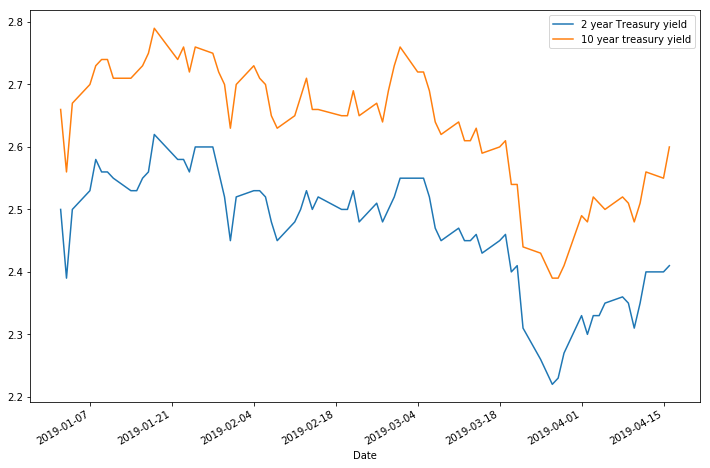

In [7]:
yield_curve['2 YR'].plot(label='2 year Treasury yield',figsize=(12,8))
yield_curve['10 YR'].plot(label='10 year treasury yield')
plt.legend();

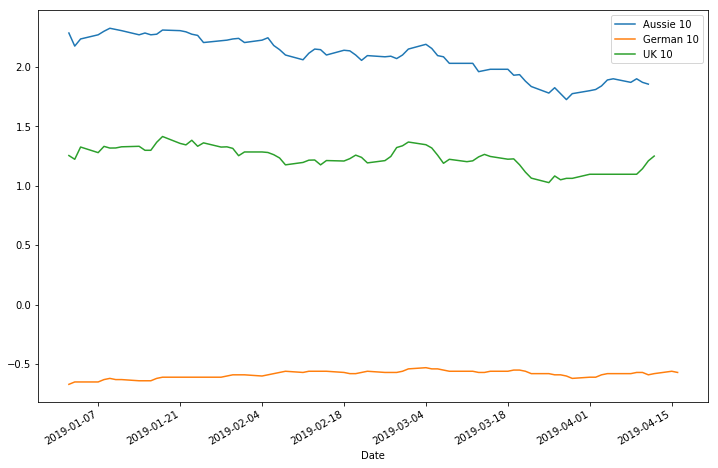

In [8]:
yield_curve_australia['Australian Government 10 year bond. Units: Per cent per annum; Series ID: FCMYGBAG10D'].plot(label= 'Aussie 10', figsize=(12,8))
yield_curve_germany['Value'].plot(label='German 10')
yield_curve_uk['Value'].plot(label='UK 10')
plt.legend();

In [9]:
z0 = yield_curve['2 YR']
z1 = yield_curve['10 YR']

In [10]:
y_aussie = yield_curve_australia['Australian Government 10 year bond. Units: Per cent per annum; Series ID: FCMYGBAG10D']
y_germany = yield_curve_germany['Value']
y_uk = yield_curve_uk['Value']

# Augmented Engle-Granger two-step cointegration test

In [11]:
t_stat_summary = statsmodels.tsa.stattools.coint(z0, z1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True)

In [12]:
print('Cointegration test USA 10-2')
print('----------------------------------------')
print('T-stat for the pair 2-Year-T-notes VS 10-Year-T-notes:', t_stat_summary[0])
print('Alpha value for the T-stat                           :{} ' .format(t_stat_summary[1]))
print('--------------------------------------')
print('Critical value 99%:  {}'.format(t_stat_summary[2][0]))
print('Critical value 95%:  {}'.format(t_stat_summary[2][1]))
print('Critical value 90%:  {}'.format(t_stat_summary[2][2]))

Cointegration test USA 10-2
----------------------------------------
T-stat for the pair 2-Year-T-notes VS 10-Year-T-notes: -4.929197031098819
Alpha value for the T-stat                           :0.00022171570826164607 
--------------------------------------
Critical value 99%:  -4.05501712191358
Critical value 95%:  -3.4223086651234564
Critical value 90%:  -3.10388024691358


In [13]:
np.corrcoef(yield_curve['2 YR'],yield_curve['10 YR'])

array([[1.        , 0.98857014],
       [0.98857014, 1.        ]])

In [14]:
np.cov(yield_curve['2 YR'],yield_curve['10 YR'])

array([[0.00963855, 0.0099886 ],
       [0.0099886 , 0.01059212]])

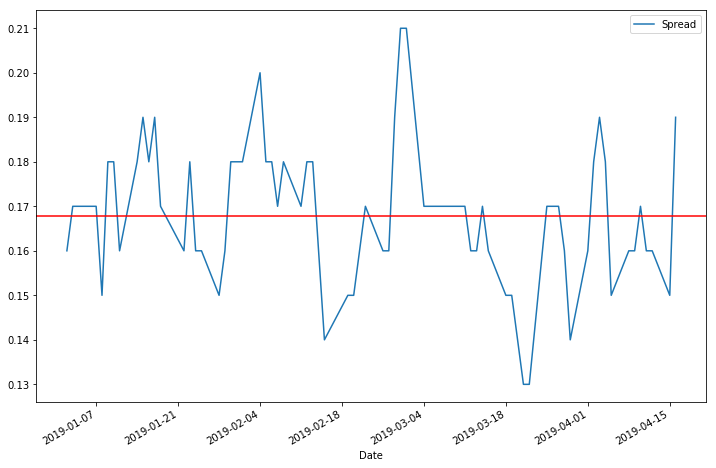

In [15]:
#Yield spread USA
spread_yield = yield_curve['10 YR'] - yield_curve['2 YR']
spread_yield.plot(label='Spread',figsize=(12,8))
plt.axhline(spread_yield.mean(),c='r')
plt.legend();

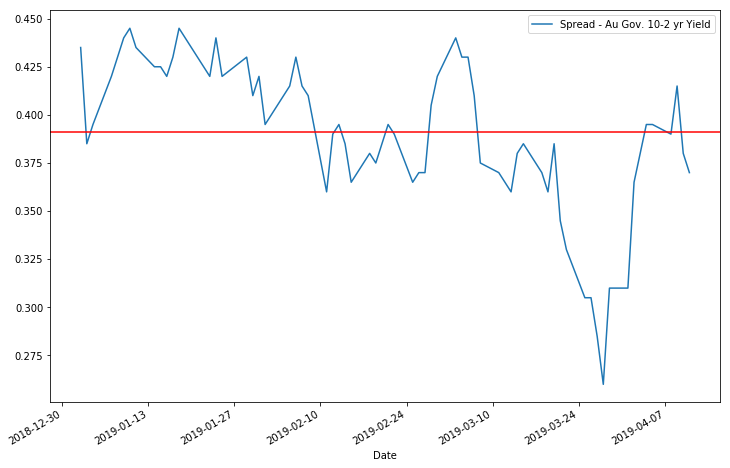

In [16]:
#Yield Spread AUTRALIA
spread_yield_au = yield_curve_australia['Australian Government 10 year bond. Units: Per cent per annum; Series ID: FCMYGBAG10D'] - yield_curve_australia['Australian Government 2 year bond. Units: Per cent per annum; Series ID: FCMYGBAG2D']
spread_yield_au.plot(label='Spread - Au Gov. 10-2 yr Yield',figsize=(12,8))
plt.axhline(spread_yield_au.mean(),c='r')
plt.legend();

In [17]:
def zscore_yield(yield_curve):
    return (yield_curve - yield_curve.mean()) / np.std(yield_curve)

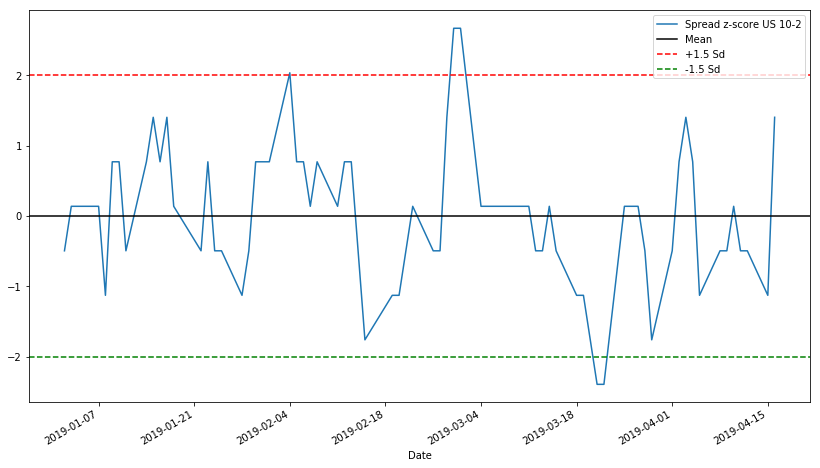

In [18]:
zscore_yield(spread_yield).plot(figsize=(14,8))
plt.axhline(zscore_yield(spread_yield).mean(), color='black')
plt.axhline(2.0, c='r', ls='--')
plt.axhline(-2.0, c='g', ls='--')
plt.legend(['Spread z-score US 10-2', 'Mean', '+1.5 Sd', '-1.5 Sd']);

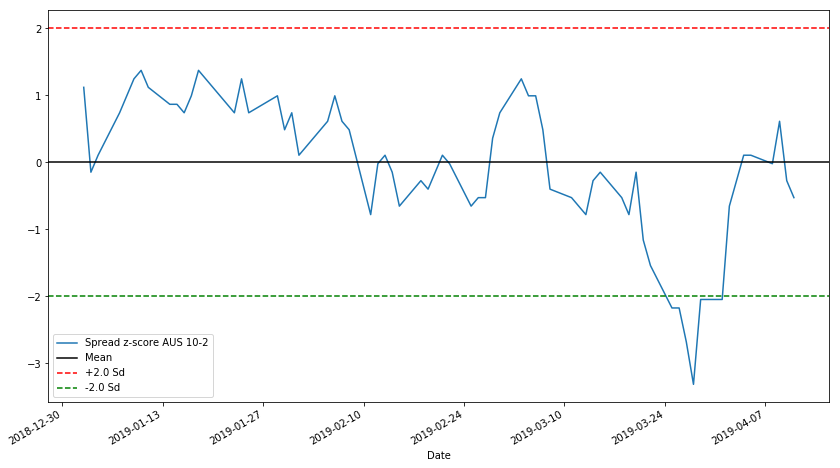

In [19]:
zscore_yield(spread_yield_au).plot(figsize=(14,8))
plt.axhline(zscore_yield(spread_yield_au).mean(), color='black')
plt.axhline(2.0, c='r', ls='--')
plt.axhline(-2.0, c='g', ls='--')
plt.legend(['Spread z-score AUS 10-2', 'Mean', '+2.0 Sd', '-2.0 Sd']);

# USA Treasury 10-2 year spread

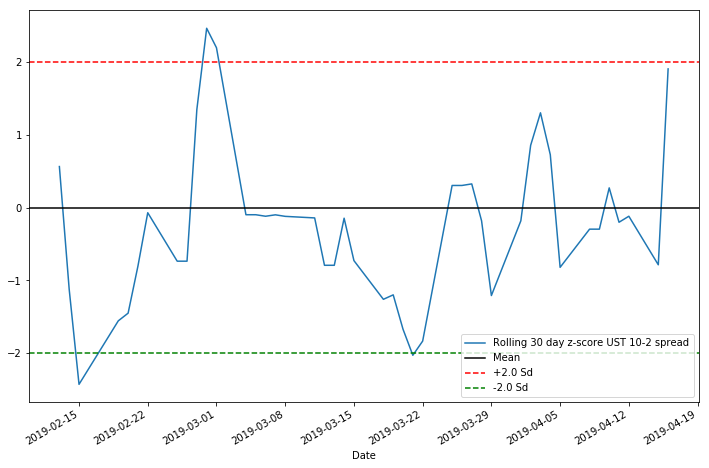

In [20]:
#1 day moving average of the price spread
spread_mavg_yield = spread_yield.rolling(1).mean()

# 30 day moving average of the price spread
spread_mavg30_yield = spread_yield.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30_yield = spread_yield.rolling(30).std()

# Compute the z score for each day
zscore_30_yield = (spread_mavg_yield - spread_mavg30_yield)/std_30_yield



zscore_30_yield.plot(figsize=(12,8),label='Rolling 30 day Z score')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='green',linestyle='--')
plt.legend(['Rolling 30 day z-score UST 10-2 spread', 'Mean', '+2.0 Sd', '-2.0 Sd']);

# AU government 10Yr and 2Yr Spead

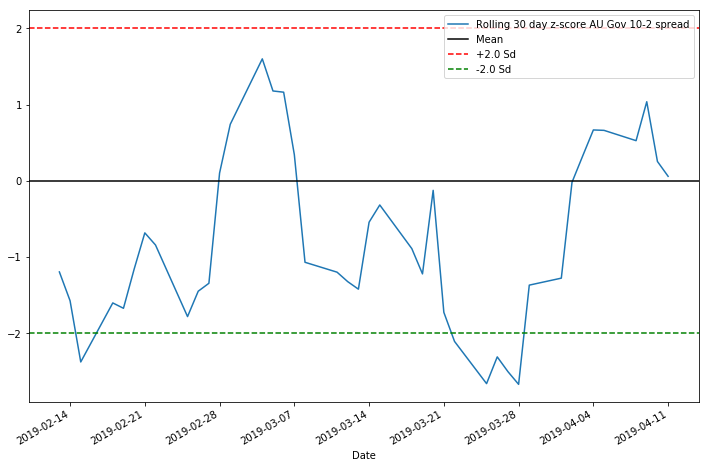

In [21]:
#1 day moving average of the price spread
spread_mavg_yield_au = spread_yield_au.rolling(1).mean()

# 30 day moving average of the price spread
spread_mavg30_yield_au = spread_yield_au.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30_yield_au = spread_yield_au.rolling(30).std()

# Compute the z score for each day
zscore_30_yield_au = (spread_mavg_yield_au - spread_mavg30_yield_au)/std_30_yield_au



zscore_30_yield_au.plot(figsize=(12,8),label='Rolling 30 day Z score for AU GOV bonds')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='green',linestyle='--')
plt.legend(['Rolling 30 day z-score AU Gov 10-2 spread', 'Mean', '+2.0 Sd', '-2.0 Sd']);

In [22]:
zscore_30_yield

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
2019-01-10         NaN
2019-01-11         NaN
2019-01-14         NaN
2019-01-15         NaN
2019-01-16         NaN
2019-01-17         NaN
2019-01-18         NaN
2019-01-22         NaN
2019-01-23         NaN
2019-01-24         NaN
2019-01-25         NaN
2019-01-28         NaN
2019-01-29         NaN
2019-01-30         NaN
2019-01-31         NaN
2019-02-01         NaN
2019-02-04         NaN
2019-02-05         NaN
2019-02-06         NaN
2019-02-07         NaN
2019-02-08         NaN
2019-02-11         NaN
2019-02-12         NaN
2019-02-13    0.562974
                ...   
2019-03-06   -0.119818
2019-03-07   -0.100242
2019-03-08   -0.121329
2019-03-11   -0.142856
2019-03-12   -0.793665
2019-03-13   -0.793665
2019-03-14   -0.146699
2019-03-15   -0.729527
2019-03-18   -1.261228
2019-03-19   -1.200011
2019-03-20   -1.672387
2019-03-21   -2.030038
2019-0

In [23]:
zscore_30_yield_au

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
2019-01-10         NaN
2019-01-11         NaN
2019-01-14         NaN
2019-01-15         NaN
2019-01-16         NaN
2019-01-17         NaN
2019-01-18         NaN
2019-01-21         NaN
2019-01-22         NaN
2019-01-23         NaN
2019-01-24         NaN
2019-01-25         NaN
2019-01-29         NaN
2019-01-30         NaN
2019-01-31         NaN
2019-02-01         NaN
2019-02-04         NaN
2019-02-05         NaN
2019-02-06         NaN
2019-02-07         NaN
2019-02-08         NaN
2019-02-11         NaN
2019-02-12         NaN
2019-02-13   -1.193626
                ...   
2019-03-01    0.741279
2019-03-04    1.598916
2019-03-05    1.178149
2019-03-06    1.162154
2019-03-07    0.343688
2019-03-08   -1.067064
2019-03-11   -1.196553
2019-03-12   -1.320790
2019-03-13   -1.419362
2019-03-14   -0.541571
2019-03-15   -0.315986
2019-03-18   -0.887806
2019-0